In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train),(x_test, y_test)= cifar10.load_data()

In [3]:
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [4]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

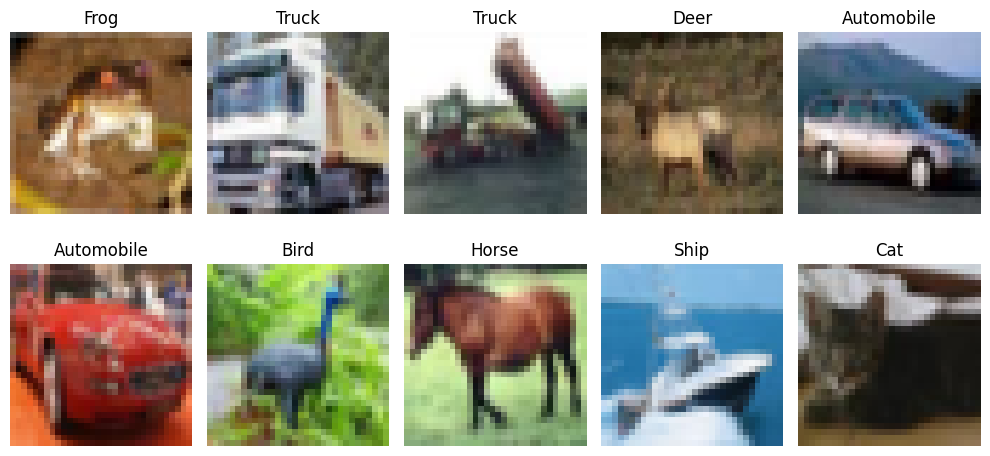

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [6]:
x_train = x_train / 255.0
x_test = x_test / 255.0


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [8]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape}, y_val shape: {y_val.shape}")

x_train shape: (40000, 32, 32, 3), y_train shape: (40000, 10)
x_val shape: (10000, 32, 32, 3), y_val shape: (10000, 10)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [13]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [14]:
# Early stopping to stop training when validation accuracy stops improving
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [15]:
# Save the best model during training
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_accuracy', mode='max')

In [16]:
callbacks = [early_stopping, model_checkpoint]

In [17]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val),
                    callbacks=callbacks)

Epoch 1/20
625/625 [==============================] - 23s 36ms/step - loss: 1.7275 - accuracy: 0.3643 - val_loss: 1.3967 - val_accuracy: 0.4879
Epoch 2/20
625/625 [==============================] - 23s 37ms/step - loss: 1.4117 - accuracy: 0.4909 - val_loss: 1.2614 - val_accuracy: 0.5456
Epoch 3/20
625/625 [==============================] - 24s 38ms/step - loss: 1.2774 - accuracy: 0.5430 - val_loss: 1.1471 - val_accuracy: 0.6012
Epoch 4/20
625/625 [==============================] - 21s 33ms/step - loss: 1.1893 - accuracy: 0.5749 - val_loss: 1.0868 - val_accuracy: 0.6174
Epoch 5/20
625/625 [==============================] - 21s 33ms/step - loss: 1.1212 - accuracy: 0.6025 - val_loss: 1.0164 - val_accuracy: 0.6386
Epoch 6/20
625/625 [==============================] - 20s 32ms/step - loss: 1.0621 - accuracy: 0.6241 - val_loss: 1.0120 - val_accuracy: 0.6367
Epoch 7/20
625/625 [==============================] - 21s 33ms/step - loss: 1.0228 - accuracy: 0.6389 - val_loss: 1.0010 - val_accuracy:

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 [==============================] - 1s 5ms/step - loss: 0.8931 - accuracy: 0.7003
Test Accuracy: 0.7002999782562256
